# Matplotlib tutorial

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

    Link matplotlib colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    Link matplotlib markers: https://matplotlib.org/3.3.3/api/markers_api.html

## functions plot

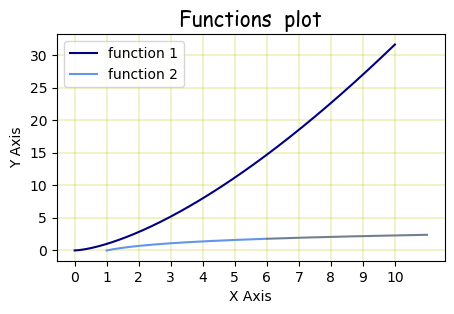

In [2]:
x = np.linspace(0, 10, 1000)
y = x ** 1.5

# Resize Graph (dpi specifies pixels per inch)
plt.figure(figsize=(5,3), dpi=100)

# plot 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
plt.plot(x,y, 'navy', label='function 1')

# plot 2

# select interval we want to plot points at
x2 = np.linspace(0, 10, 1000) + 1
y2 = np.log(x2)
delimiter = int(x2.shape[0]/2)

# Plot part of the graph as line
plt.plot(x2[:delimiter], y2[:delimiter], 'cornflowerblue', label='function 2')

# Plot remainder of graph as a dot
plt.plot(x2[delimiter:], y2[delimiter:], 'slategray')

plt.title('Functions  plot', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks(list(range(11)))
# plt.yticks(..)

# plot grid
plt.grid(color='y', linewidth=0.3)

# Add a legend
plt.legend()

# save plot figure
plt.savefig('mygraph1.png', dpi=300)

# Show plot
plt.show()

## bar chart

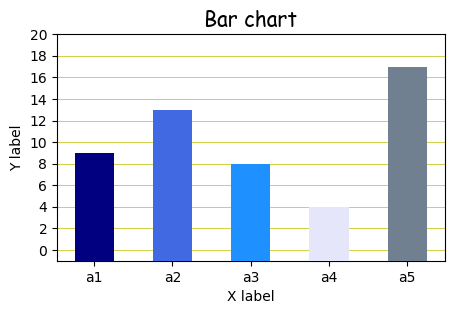

In [3]:
labels = ['a1', 'a2', 'a3', 'a4', 'a5']
values = np.random.randint(0, 20, size=(5,))

plt.figure(figsize=(5,3), dpi=100)

plt.bar(labels, values, width=0.5, bottom=-1, color=['navy', 'royalblue', 'dodgerblue', 'lavender', 'slategray'], zorder=3)

plt.title('Bar chart', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})

plt.xlabel('X label')
plt.ylabel('Y label')

plt.yticks(list(range(0, 21, 2)))

# Set the zorder for the artist. Artists with lower zorder values are drawn first.
plt.grid(color='y', axis='y', linewidth=0.5, zorder=1)

plt.savefig('barchart1.png', dpi=300)

plt.show()

## Plotting time series

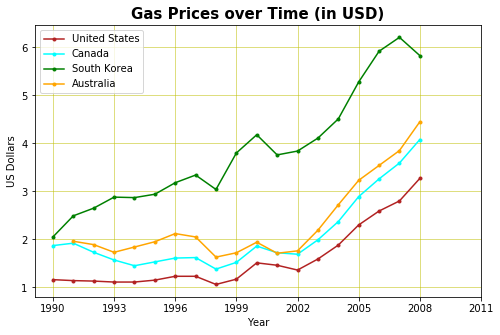

In [4]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight':'bold', 'fontsize': 15})

plt.plot(gas.Year, gas.USA, color='firebrick', marker='.', label='United States')
plt.plot(gas.Year, gas.Canada, color='aqua', marker='.', label='Canada')
plt.plot(gas.Year, gas['South Korea'], color='green', marker='.', label='South Korea')
plt.plot(gas.Year, gas.Australia, marker='.', color='orange', label='Australia')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

plt.xticks(gas.Year[::3].tolist() + [2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.grid(color='y', linewidth=0.5, zorder=1)

plt.legend()

#plt.savefig('timeseries1.png', dpi=300)

plt.show()

## pie chats

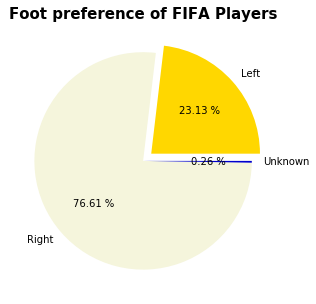

In [5]:
fifa = pd.read_csv('fifa_data.csv')

left = (fifa['Preferred Foot'] == 'Left').sum()
right = (fifa['Preferred Foot'] == 'Right').sum()
unknown = fifa['Preferred Foot'].isna().sum()

plt.figure(figsize=(8,5))

plt.title('Foot preference of FIFA Players', fontdict={'fontweight':'bold', 'fontsize': 15})

labels = ['Left', 'Right', 'Unknown']
colors = ['gold', 'beige', 'mediumblue']
exp = [0.1, 0, 0]

plt.pie([left, right, unknown], labels=labels, colors=colors, autopct='%.2f %%', explode=exp)

plt.show()

## histogram

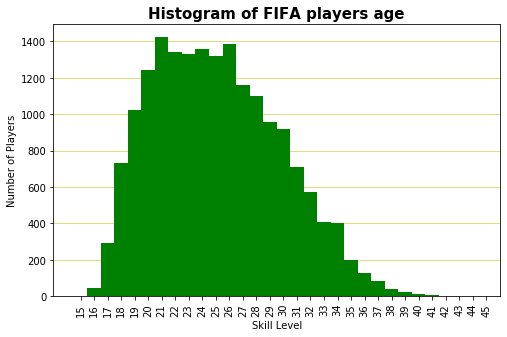

In [6]:
fifa = pd.read_csv('fifa_data.csv')

plt.figure(figsize=(8,5))

plt.hist(fifa.Age,
         bins=range(fifa.Age.min()-1, fifa.Age.max()+1),
         color='green',
         align='left',
         orientation='vertical',
         log=False, 
         zorder=3)

plt.xticks(range(fifa.Age.min()-1, fifa.Age.max()+1), rotation=90)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Histogram of FIFA players age', fontdict={'fontweight':'bold', 'fontsize': 15})

plt.grid(color='y', axis='y', linewidth=0.5, zorder=1)

plt.savefig('histogram1.png', dpi=300)

plt.show()

## boxplot

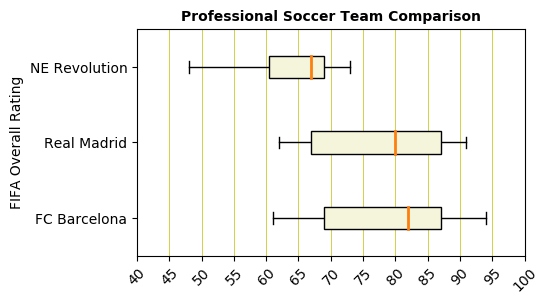

In [7]:
fifa = pd.read_csv('fifa_data.csv')

plt.figure(figsize=(5,3), dpi=100)

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

bp = plt.boxplot([barcelona, madrid, revs],
                 labels=['FC Barcelona','Real Madrid','NE Revolution'],
                 patch_artist=True,
                 medianprops={'linewidth': 2},
                 vert=False)

plt.title('Professional Soccer Team Comparison', fontdict={'fontweight':'bold', 'fontsize': 10})
plt.ylabel('FIFA Overall Rating')

plt.xticks(range(40, 101, 5), rotation=45)

for box in bp['boxes']:
    # change outline color
    #box.set(color='beige', linewidth=2)
    # change fill color
    box.set(facecolor='beige')
    # change hatch
    #box.set(hatch='/')

plt.grid(color='y', axis='x', linewidth=0.5)
    
plt.show()

## simple scatter

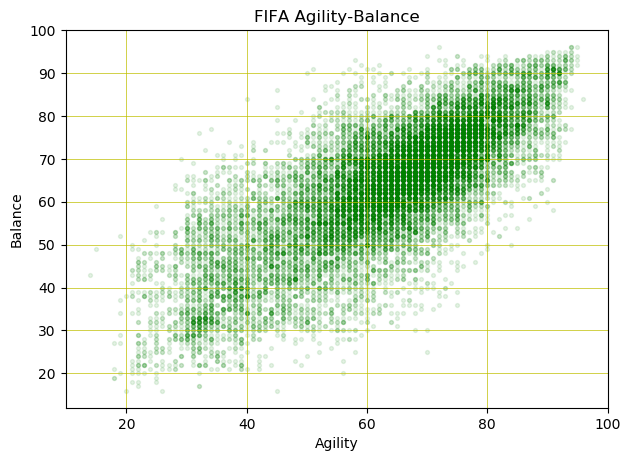

In [8]:
fifa = pd.read_csv('fifa_data.csv')

plt.figure(figsize=(7,5), dpi=100)

# Plot
plt.scatter(fifa.Agility, fifa.Balance, s=np.pi*2.5, c='green', alpha=0.1)

plt.title('FIFA Agility-Balance')
plt.xlabel('Agility')
plt.ylabel('Balance')

plt.grid(color='y', linewidth=0.5)

plt.show()

## Multiple plots

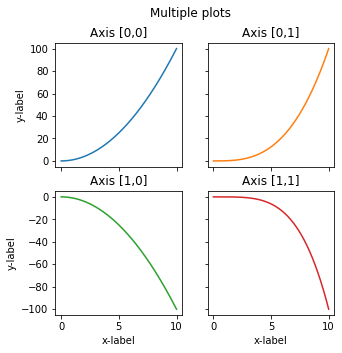

In [9]:
x = np.linspace(0, 10, 1000)

fig, axs = plt.subplots(2, 2, figsize=(5,5))

fig.suptitle('Multiple plots')

axs[0, 0].plot(x, x**2)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, x**3, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -x**2, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -x**4, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()